In [35]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.dates as dates
import matplotlib.pyplot as plt

In [51]:
# ou créer une boucle pour importer les fichiers existants 
filenames=['Desktop/00_doc/correlationStocks/docCSV/BTC-USD.csv', 
           'Desktop/00_doc/correlationStocks/docCSV/ETH-USD.csv',
           'Desktop/00_doc/correlationStocks/docCSV/LTC-USD.csv',
          'Desktop/00_doc/correlationStocks/docCSV/XRP-USD.csv',
           'Desktop/00_doc/correlationStocks/docCSV/DJI.csv',
           'Desktop/00_doc/correlationStocks/docCSV/TWTR.csv', 
           'Desktop/00_doc/correlationStocks/docCSV/IXIC.csv'] 

           
            
#boucle
df=[]
for filename in filenames:
    df.append(pd.read_csv(filename, engine='python', sep=None,parse_dates=False, 
                          decimal='.', na_values='n/a', index_col=None))
df[3].info()
df[3].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 7 columns):
Date         1546 non-null object
Open         1546 non-null float64
High         1546 non-null float64
Low          1546 non-null float64
Close        1546 non-null float64
Adj Close    1546 non-null float64
Volume       1546 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 84.6+ KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-21,0.01748,0.01750,0.01523,0.01523,0.01523,0
1,2015-01-22,0.01523,0.01750,0.01523,0.01602,0.01602,0
2,2015-01-23,0.01602,0.01700,0.01600,0.01600,0.01600,0
3,2015-01-24,0.01600,0.01739,0.01500,0.01739,0.01739,0
4,2015-01-25,0.01739,0.01739,0.01560,0.01700,0.01700,0


In [54]:

#attribuer un nom aux données importées et créer une colonne 'ticker'
BTCUSD=df[0]
ETHUSD=df[1]
LTCUSD=df[2]
XRPUSD=df[3]
DJI=df[4]
Twitter=df[5]
NASDAQ=df[6]




In [55]:
print(BTCUSD.head())
print(BTCUSD.tail())


         Date     Open     High      Low    Close  Adj Close  Volume
0  2010-07-16  0.04951  0.04951  0.04951  0.04951    0.04951       0
1  2010-07-17  0.04951  0.08585  0.05941  0.08584    0.08584       5
2  2010-07-18  0.08584  0.09307  0.07723  0.08080    0.08080      49
3  2010-07-19  0.08080  0.08181  0.07426  0.07474    0.07474      20
4  2010-07-20  0.07474  0.07921  0.06634  0.07921    0.07921      42
            Date         Open         High          Low        Close  \
3187  2019-04-16  5212.810059  5270.759766  5190.810059  5236.259766   
3188  2019-04-17  5236.259766  5317.779785  5232.990234  5289.750000   
3189  2019-04-18  5289.750000  5353.009766  5212.180176  5295.529785   
3190  2019-04-19  5295.529785  5366.600098  5274.450195  5326.180176   
3191  2019-04-20  5326.180176  5348.589844  5232.770020  5305.740234   

        Adj Close     Volume  
3187  5236.259766  194699629  
3188  5289.750000  187312150  
3189  5295.529785  158699049  
3190  5326.180176  123577001 

In [56]:
#créer une colonne ticker en y intégrant l'acronyme correspondant à chaque société
BTCUSD['ticker']='BTC'
ETHUSD['ticker']='ETH'
LTCUSD['ticker']= 'LTC'
XRPUSD['ticker']= 'XRP'
DJI['ticker']='DJI.US'
Twitter['ticker']='TWTR'
NASDAQ['ticker']='IXIC.US'

In [57]:
#créer une seule base de données ”cryptoStocks”
stocks_list=[BTCUSD, ETHUSD, LTCUSD, XRPUSD, DJI, Twitter, NASDAQ] #
cryptoStocks=pd.concat(stocks_list,sort='ticker')

#description de la BD cryptoStocks
cryptoStocks.info()
print(cryptoStocks.head())
print(cryptoStocks.tail())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 30248 entries, 0 to 12159
Data columns (total 8 columns):
Adj Close    30248 non-null float64
Close        30248 non-null float64
Date         30248 non-null object
High         30248 non-null float64
Low          30248 non-null float64
Open         30248 non-null float64
Volume       30248 non-null int64
ticker       30248 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 2.1+ MB
   Adj Close    Close        Date     High      Low     Open  Volume ticker
0    0.04951  0.04951  2010-07-16  0.04951  0.04951  0.04951       0    BTC
1    0.08584  0.08584  2010-07-17  0.08585  0.05941  0.04951       5    BTC
2    0.08080  0.08080  2010-07-18  0.09307  0.07723  0.08584      49    BTC
3    0.07474  0.07474  2010-07-19  0.08181  0.07426  0.08080      20    BTC
4    0.07921  0.07921  2010-07-20  0.07921  0.06634  0.07474      42    BTC
         Adj Close        Close        Date         High          Low  \
12155  8000.22998

In [58]:
#restreindre aux colonnes 'ticker', 'Adj Close' et 'Date'
cryptoStocks_restraint= cryptoStocks[['Date','ticker','Adj Close']]

#voir les 5 dernières ligne de la BD
print(cryptoStocks_restraint.head())
print(cryptoStocks_restraint.tail())

         Date ticker  Adj Close
0  2010-07-16    BTC    0.04951
1  2010-07-17    BTC    0.08584
2  2010-07-18    BTC    0.08080
3  2010-07-19    BTC    0.07474
4  2010-07-20    BTC    0.07921
             Date   ticker    Adj Close
12155  2019-04-16  IXIC.US  8000.229980
12156  2019-04-17  IXIC.US  7996.080078
12157  2019-04-18  IXIC.US  7998.060059
12158  2019-04-22  IXIC.US  8015.270020
12159  2019-04-23  IXIC.US  8120.819824


In [59]:
#indexer les colonnes Date et ticker pour calculer la variation sur la colonne Adj Close seule
cryptoStocks_index=cryptoStocks_restraint.set_index(['Date', 'ticker'])
print(cryptoStocks_index.head())
print(cryptoStocks_index.tail())
#compter les données qui sont vides 
print(" non renseigné sur la colonne Adj Close ???")
cryptoStocks_index.isnull().sum()


                   Adj Close
Date       ticker           
2010-07-16 BTC       0.04951
2010-07-17 BTC       0.08584
2010-07-18 BTC       0.08080
2010-07-19 BTC       0.07474
2010-07-20 BTC       0.07921
                      Adj Close
Date       ticker              
2019-04-16 IXIC.US  8000.229980
2019-04-17 IXIC.US  7996.080078
2019-04-18 IXIC.US  7998.060059
2019-04-22 IXIC.US  8015.270020
2019-04-23 IXIC.US  8120.819824
 non renseigné sur la colonne Adj Close ???


Adj Close    0
dtype: int64

In [43]:
#recherche des données dupliquées
#print(cryptoStocks_index.duplicated(subset=('Adj Close')).head(110))

In [60]:
#exporter les données de consultStocks vers Excel
#writer=pd.ExcelWriter('Desktop/00_doc/correlationStocks/cryptoStocks.xlsx', engine='xlsxwriter')
cryptoStocks_index.to_excel('Desktop/00_doc/correlationStocks/cryptoStocks_index.xlsx', sheet_name='Sheet1')



In [61]:
#faire pivoter les colonnes
cryptoStocks_graph = cryptoStocks_restraint.pivot(index='Date', columns='ticker',values='Adj Close' ) #index='Date', columns='ticker', values='Adj Close'
cryptoStocks_graph.head()

ticker,BTC,DJI.US,ETH,IXIC.US,LTC,TWTR,XRP
Date,,,,,,,
1971-02-05,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
1971-02-08,NaN,NaN,NaN,100.839996,NaN,NaN,NaN
1971-02-09,NaN,NaN,NaN,100.760002,NaN,NaN,NaN
1971-02-10,NaN,NaN,NaN,100.690002,NaN,NaN,NaN
1971-02-11,NaN,NaN,NaN,101.449997,NaN,NaN,NaN


In [62]:
#renseigner les données Null 
cryptoStocks_fill=cryptoStocks_graph.bfill().ffill()
cryptoStocks_fill.head()

ticker,BTC,DJI.US,ETH,IXIC.US,LTC,TWTR,XRP
Date,,,,,,,
1971-02-05,0.04951,1292.619995,3.0,100.000000,3.0,44.900002,0.01523
1971-02-08,0.04951,1292.619995,3.0,100.839996,3.0,44.900002,0.01523
1971-02-09,0.04951,1292.619995,3.0,100.760002,3.0,44.900002,0.01523
1971-02-10,0.04951,1292.619995,3.0,100.690002,3.0,44.900002,0.01523
1971-02-11,0.04951,1292.619995,3.0,101.449997,3.0,44.900002,0.01523


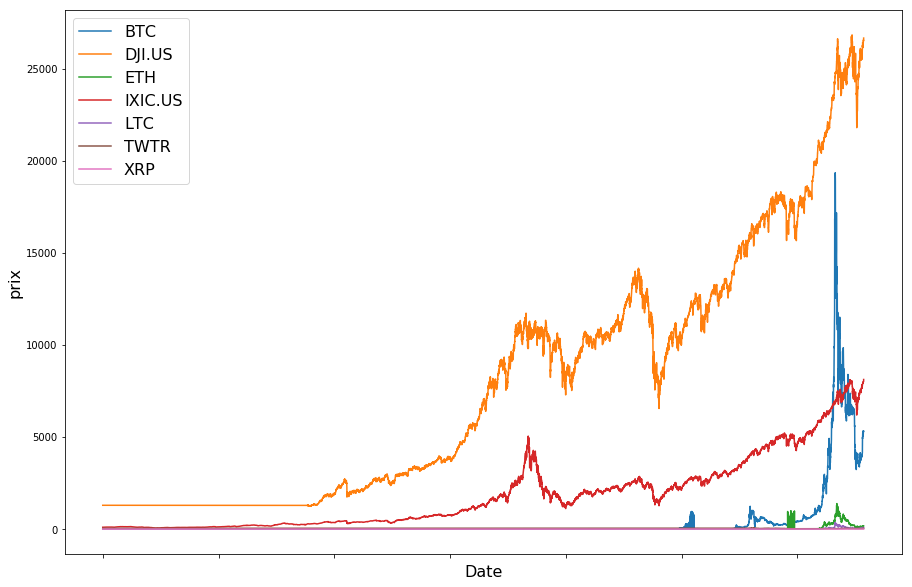

In [72]:

#créer une représentation linéaire des cours de chaque société
ax= cryptoStocks_fill.plot(kind='line', figsize=(15,10))
plt.legend(fontsize=16) 
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('prix', fontsize=16)
plt.show()


Les prix de ces actions semblent être corrélés au regard de ce graphique.
Cependant, grâce à la réprésentation par heatmap de Seaborn nous pouvons encore mieux représenter ces corrélations. L'évolution des prix de CGI et Accenture sont presque parfaitement corrélés que ce soit par la méthode de rang Spearman ou la méthode classique de Pearson.



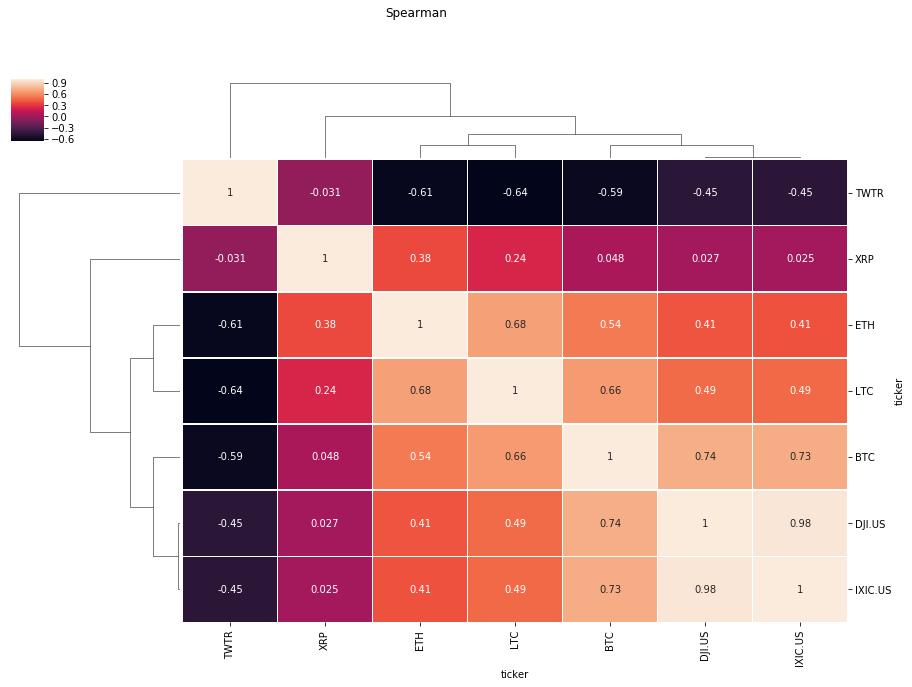

ticker        BTC    DJI.US       ETH   IXIC.US       LTC      TWTR       XRP
ticker                                                                       
BTC      1.000000  0.743015  0.542745  0.731222  0.664571 -0.588235  0.048364
DJI.US   0.743015  1.000000  0.412250  0.980693  0.491244 -0.452813  0.026874
ETH      0.542745  0.412250  1.000000  0.405467  0.680301 -0.612020  0.377628
IXIC.US  0.731222  0.980693  0.405467  1.000000  0.485923 -0.449380  0.024636
LTC      0.664571  0.491244  0.680301  0.485923  1.000000 -0.638315  0.244547
TWTR    -0.588235 -0.452813 -0.612020 -0.449380 -0.638315  1.000000 -0.031150
XRP      0.048364  0.026874  0.377628  0.024636  0.244547 -0.031150  1.000000


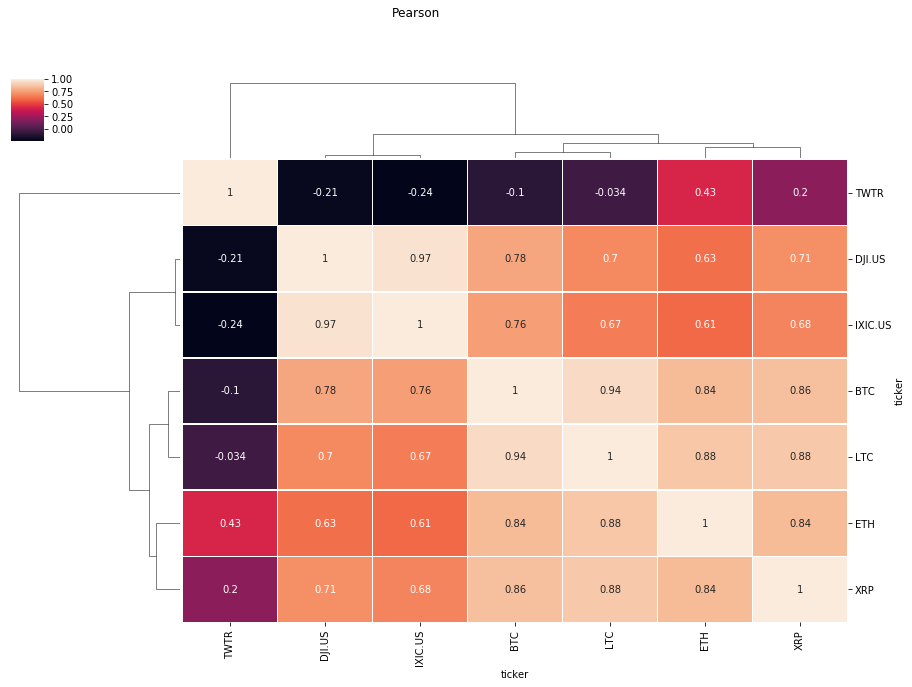

ticker        BTC    DJI.US       ETH   IXIC.US       LTC      TWTR       XRP
ticker                                                                       
BTC      1.000000  0.779466  0.843604  0.756156  0.943099 -0.099849  0.859012
DJI.US   0.779466  1.000000  0.626807  0.970556  0.700182 -0.210263  0.710219
ETH      0.843604  0.626807  1.000000  0.611340  0.881077  0.425529  0.842974
IXIC.US  0.756156  0.970556  0.611340  1.000000  0.665754 -0.237034  0.681663
LTC      0.943099  0.700182  0.881077  0.665754  1.000000 -0.033579  0.884278
TWTR    -0.099849 -0.210263  0.425529 -0.237034 -0.033579  1.000000  0.197394
XRP      0.859012  0.710219  0.842974  0.681663  0.884278  0.197394  1.000000


In [71]:
#importer la bibliothèque seaborn
import seaborn as sns

#créer une matrice de corrélation de type Spearman (rang)
cryptoStocks_corr = cryptoStocks_fill.corr(method='spearman')


# représenter la matrice en graphique type 'heatmap'
graph = sns.clustermap(cryptoStocks_corr, annot=True, annot_kws={"size": 10}, linewidths=.4, figsize=(15, 10))
plt.setp(graph.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(graph.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
graph.fig.suptitle('Spearman')
plt.show()
print(cryptoStocks_corr)


#créer une matrice de corrélation de type Pearson (rang)
cryptoStocks_corr = cryptoStocks_graph.corr(method='pearson')


# représenter la matrice en graphique type 'heatmap'
graph = sns.clustermap(cryptoStocks_corr, annot=True, annot_kws={"size": 10}, linewidths=.4, figsize=(15, 10))
plt.setp(graph.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(graph.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
graph.fig.suptitle('Pearson')
plt.show()
print(cryptoStocks_corr)

1/ Le DJI et le NASDAQ ont une corrélation presque parfaite. Le BItcoin et le lightcoin sont 
également corrélés parfaitement
2/ Les cryptomonnaies ont également entre elles, une corrélation élevée
3/ Twitter est un actif faiblement corrélé ou faiblement corrélé négativement aux autres actifs ici présents
4/ contrairement à ce que la plus part des personnes croient, les cryptomonnaies sont corrélées aux indces DJI et NASDAQ. La corrélation du bitcoin en est particulièrement élévé